## Final Project

### Hypothesis
Video game details such as publisher, game genre, and console can accurately predict how well the game will sell.

### Steps

* Identify the Problem
* Acquire the Data
* Parse the Data
* Mine the Data
* Refine the Data
* Create a Data Model
* Present the Results

In [86]:
#imports
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.formula.api as smf

df_raw = pd.read_csv("vgsales.csv")

In [87]:
df_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [88]:
df_raw.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [89]:
# Check the data for the years 2016, 2017, 2020, and nan
# Drop the rows that are useless

df_raw['Year'].unique()

array([ 2006.,  1985.,  2008.,  2009.,  1996.,  1989.,  1984.,  2005.,
        1999.,  2007.,  2010.,  2013.,  2004.,  1990.,  1988.,  2002.,
        2001.,  2011.,  1998.,  2015.,  2012.,  2014.,  1992.,  1997.,
        1993.,  1994.,  1982.,  2003.,  1986.,  2000.,    nan,  1995.,
        2016.,  1991.,  1981.,  1987.,  1980.,  1983.,  2020.,  2017.])

In [90]:
# Copy the data to delete the rows where there is no year or where the year is 2016 and beyond.

data = df_raw.copy()

In [91]:
# Show data where the year is 2016 and beyond

data[data.Year > 2015] 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
271,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
351,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
770,772,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
845,847,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
1026,1028,Overwatch,PS4,2016.0,Shooter,Activision,0.64,0.68,0.14,0.26,1.73
1156,1158,No Man's Sky,PS4,2016.0,Action,Hello Games,0.58,0.74,0.02,0.26,1.60
1189,1191,Dark Souls III,PS4,2016.0,Role-Playing,Namco Bandai Games,0.58,0.44,0.33,0.21,1.56
1224,1226,FIFA 17,XOne,2016.0,Sports,Electronic Arts,0.17,1.26,0.00,0.10,1.53
1389,1391,Doom (2016),PS4,2016.0,Shooter,Bethesda Softworks,0.49,0.66,0.02,0.22,1.39


In [92]:
# Drop the data for 2016 and beyond
# This also dropped all nan.

data = data[data.Year < 2016]

In [93]:
# Confirm that I've dropped the data

data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,15979.000000,15979.000000,15979.00000,15979.000000,15979.000000,15979.000000,15979.000000
mean,8224.104262,2006.197071,0.26976,0.149093,0.079514,0.048892,0.547537
std,4775.817280,5.714810,0.82956,0.512557,0.314536,0.191612,1.580275
min,1.000000,1980.000000,0.00000,0.000000,0.000000,0.000000,0.010000
25%,4080.500000,2003.000000,0.00000,0.000000,0.000000,0.000000,0.060000
50%,8207.000000,2007.000000,0.08000,0.020000,0.000000,0.010000,0.180000
75%,12332.500000,2010.000000,0.24000,0.110000,0.040000,0.040000,0.490000
max,16600.000000,2015.000000,41.49000,29.020000,10.220000,10.570000,82.740000


In [94]:
# From the above table, I realized that there are no more NaN values in Year, so I used the formulas below to just confirm they are gone.

print data['Year'].isnull().sum()
data['Year'].unique()

0


array([ 2006.,  1985.,  2008.,  2009.,  1996.,  1989.,  1984.,  2005.,
        1999.,  2007.,  2010.,  2013.,  2004.,  1990.,  1988.,  2002.,
        2001.,  2011.,  1998.,  2015.,  2012.,  2014.,  1992.,  1997.,
        1993.,  1994.,  1982.,  2003.,  1986.,  2000.,  1995.,  1991.,
        1981.,  1987.,  1980.,  1983.])

In [95]:
# Check the data dictionary for all these platforms

data['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO',
       'GG', 'PCFX'], dtype=object)

### Data Dictionary - Platforms
1	PlayStation 2 (PS2)  
2	Xbox 360 (X360)	  
3	PlayStation 3 (PS3)  	
4	Wii (Wii)	 
5	PlayStation (PS)  	
6	Nintendo DS (DS)  
7	Nintendo Entertainment System (NES)	  
8	Game Boy (GB)  
9	Super Nintendo Entertainment System (SNES)	
10	Game Boy Advance (GBA)	
12	PlayStation Portable (PSP)	
13	PlayStation 4 (PS4)	
14	Xbox (XB)	
15	Nintendo 3DS (3DS)	
16	Nintendo 64 (N64)	
17	GameCube (GC)	
19	Xbox One (XOne)  
21	Wii U (WiiU)	
23	PlayStation Vita (PSV)	
47	Game Boy Color (GBC)	

In [96]:
# Show all Genres of games

data['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [97]:
# Take out the columns I'm not going to use

data = data[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Global_Sales']]

In [98]:
# Take out the platforms that are no longer being made and PCs
# Took out Atari, Sega, etc.

data = data[(data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'DS') | (data['Platform'] == 'NES') | (data['Platform'] == 'GB') | (data['Platform'] == 'SNES') | (data['Platform'] == 'GBA') | (data['Platform'] == '3DS') | (data['Platform'] == 'N64') | (data['Platform'] == 'GC') | (data['Platform'] == 'PS') | (data['Platform'] == 'PS2') | (data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'PSP') | (data['Platform'] == 'PSV') | (data['Platform'] == 'X360') | (data['Platform'] == 'XB') | (data['Platform'] == 'XOne')]

In [99]:
data.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [100]:
data_gd = data.join(pd.get_dummies(data.Genre, prefix = 'genre'))

In [101]:
data_gd.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales,genre_Action,genre_Adventure,genre_Fighting,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [102]:
data_gd = data_gd.join(pd.get_dummies(data_gd.Platform, prefix = 'platform'))

In [103]:
data_gd.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales,genre_Action,genre_Adventure,genre_Fighting,genre_Misc,...,platform_PS3,platform_PS4,platform_PSP,platform_PSV,platform_SNES,platform_Wii,platform_WiiU,platform_X360,platform_XB,platform_XOne
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
for x in data_gd.columns.values:
    print x

Name
Platform
Year
Genre
Publisher
Global_Sales
genre_Action
genre_Adventure
genre_Fighting
genre_Misc
genre_Platform
genre_Puzzle
genre_Racing
genre_Role-Playing
genre_Shooter
genre_Simulation
genre_Sports
genre_Strategy
platform_3DS
platform_DS
platform_GB
platform_GBA
platform_GC
platform_N64
platform_NES
platform_PS
platform_PS2
platform_PS3
platform_PS4
platform_PSP
platform_PSV
platform_SNES
platform_Wii
platform_WiiU
platform_X360
platform_XB
platform_XOne


In [107]:
data_gd['Global_Sales'] = data_gd['Global_Sales'].astype(np.int64)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

model = RandomForestClassifier(n_estimators = 20)
    
X = data_gd[['genre_Action', 'genre_Adventure', 'genre_Fighting', 'genre_Misc', 'genre_Platform', 'genre_Puzzle', 'genre_Racing', 'genre_Role-Playing', 'genre_Shooter', 'genre_Simulation', 'genre_Sports', 'Global_Sales']]
y = X['Global_Sales']
X.drop('Global_Sales', axis=1, inplace=True)
    
    
# Fits the model
model.fit(X, y)

/Users/suelee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,genre_Adventure,0.296689
8,genre_Shooter,0.203022
4,genre_Platform,0.158347
6,genre_Racing,0.071229
7,genre_Role-Playing,0.061451


This shows adventure has greater impact than shooter than platform etc.

In [113]:
data_gd[(data_gd['genre_Adventure'] == 1)].head()

,Name,Platform,Year,Genre,Publisher,Global_Sales,genre_Action,genre_Adventure,genre_Fighting,genre_Misc,...,platform_PS3,platform_PS4,platform_PSP,platform_PSV,platform_SNES,platform_Wii,platform_WiiU,platform_X360,platform_XB,platform_XOne
50,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,11,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,5,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
218,Assassin's Creed,PS3,2007.0,Adventure,Ubisoft,4,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,Zelda II: The Adventure of Link,NES,1987.0,Adventure,Nintendo,4,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,Rugrats: Search For Reptar,PS,1998.0,Adventure,THQ,3,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
model = RandomForestClassifier(n_estimators = 20)
    
X = data_gd[['platform_3DS', 'platform_DS', 'platform_GB', 'platform_GBA', 'platform_GC', 'platform_N64', 'platform_NES', 'platform_PS', 'platform_PS2', 'platform_PS3', 'platform_PS4', 'platform_PSP', 'platform_PSV', 'platform_SNES', 'platform_Wii', 'platform_WiiU', 'platform_X360', 'platform_XB', 'Global_Sales']]
y = X['Global_Sales']
X.drop('Global_Sales', axis=1, inplace=True)
    
    
# Fits the model
model.fit(X, y)

/Users/suelee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [115]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
6,platform_NES,0.381918
2,platform_GB,0.131112
1,platform_DS,0.080611
11,platform_PSP,0.073028
16,platform_X360,0.042008


In [118]:
current = data_gd[data_gd.Year > 2010]

In [119]:
current.describe()

,Year,Global_Sales,genre_Action,genre_Adventure,genre_Fighting,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,...,platform_PS3,platform_PS4,platform_PSP,platform_PSV,platform_SNES,platform_Wii,platform_WiiU,platform_X360,platform_XB,platform_XOne
count,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,...,3205.000000,3205.000000,3205.000000,3205.000000,3205.0,3205.000000,3205.000000,3205.000000,3205.0,3205.000000
mean,2012.710452,0.311076,0.316693,0.103276,0.043994,0.105148,0.032761,0.018409,0.041810,0.117629,...,0.209984,0.071139,0.097348,0.109204,0.0,0.061778,0.041498,0.153510,0.0,0.049610
std,1.490429,1.251074,0.465259,0.304367,0.205113,0.306792,0.178039,0.134445,0.200185,0.322218,...,0.407361,0.257097,0.296477,0.311944,0.0,0.240790,0.199469,0.360535,0.0,0.217172
min,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
75%,2014.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
max,2015.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000


In [120]:
current['Platform'].unique()

array(['PS3', 'X360', '3DS', 'PS4', 'Wii', 'DS', 'XOne', 'WiiU', 'PSV',
       'PSP', 'PS2'], dtype=object)

In [121]:
model = RandomForestClassifier(n_estimators = 20)
    
X = data_gd[['platform_3DS', 'platform_DS', 'platform_PS2', 'platform_PS3', 'platform_PS4', 'platform_PSP', 'platform_PSV', 'platform_Wii', 'platform_WiiU', 'platform_X360', 'Global_Sales']]
y = X['Global_Sales']
X.drop('Global_Sales', axis=1, inplace=True)
    
    
# Fits the model
model.fit(X, y)

/Users/suelee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,platform_DS,0.288593
5,platform_PSP,0.239768
6,platform_PSV,0.130333
4,platform_PS4,0.092456
3,platform_PS3,0.082382


In [128]:
from sklearn.linear_model import LinearRegression

# create X and y

feature_cols = ['platform_3DS', 'platform_DS', 'platform_GB', 'platform_GBA', 'platform_GC', 'platform_N64', 'platform_NES', 'platform_PS', 'platform_PS2', 'platform_PS3', 'platform_PS4', 'platform_PSP', 'platform_PSV', 'platform_SNES', 'platform_Wii', 'platform_WiiU', 'platform_X360', 'platform_XB']
X = data_gd[feature_cols]
y = data_gd.Global_Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

[('platform_3DS', -0.20620815581299837),
 ('platform_DS', -0.31102870898134916),
 ('platform_GB', 1.7482979964981376),
 ('platform_GBA', -0.3491380313152046),
 ('platform_GC', -0.36921256005057823),
 ('platform_N64', -0.129687126821598),
 ('platform_NES', 1.6436272622249688),
 ('platform_PS', -0.18815557706695774),
 ('platform_PS2', -0.21230185131022872),
 ('platform_PS3', -0.082547169811802712),
 ('platform_PS4', 0.20547831843713088),
 ('platform_PSP', -0.42923346101150162),
 ('platform_PSV', -0.48371967655035675),
 ('platform_SNES', 0.013578590036619195),
 ('platform_Wii', -0.072224659939051583),
 ('platform_WiiU', -0.17860689459547197),
 ('platform_X360', -0.030216358352656313),
 ('platform_XB', -0.41727954134309297)]

In [129]:
# create X and y
feature_cols = ['genre_Action', 'genre_Adventure', 'genre_Fighting', 'genre_Misc', 'genre_Platform', 'genre_Puzzle', 'genre_Racing', 'genre_Role-Playing', 'genre_Shooter', 'genre_Simulation', 'genre_Sports']
X = data_gd[feature_cols]
y = data_gd.Global_Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

[('genre_Action', 0.236778473695234),
 ('genre_Adventure', -0.0053744293718408498),
 ('genre_Fighting', 0.21856523904070774),
 ('genre_Misc', 0.1765755656439566),
 ('genre_Platform', 0.59437052815101266),
 ('genre_Puzzle', 0.17364588260212349),
 ('genre_Racing', 0.29823977473988156),
 ('genre_Role-Playing', 0.33877023193697603),
 ('genre_Shooter', 0.51778660163134294),
 ('genre_Simulation', 0.15328290980155068),
 ('genre_Sports', 0.22987820653119218)]

In [162]:
# Group data by consoles: Nintendo, Playstation, and Xbox

nintendo = data[(data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'DS') | (data['Platform'] == 'NES') | (data['Platform'] == 'GB') | (data['Platform'] == 'SNES') | (data['Platform'] == 'GBA') | (data['Platform'] == '3DS') | (data['Platform'] == 'N64') | (data['Platform'] == 'GC')]
print nintendo.describe()

               Rank         Year     NA_Sales     EU_Sales     JP_Sales  \
count   6123.000000  6123.000000  6123.000000  6123.000000  6123.000000   
mean    8401.524906  2006.149110     0.286701     0.127557     0.122455   
std     4620.488000     5.352258     1.095983     0.636800     0.451472   
min        1.000000  1983.000000     0.000000     0.000000     0.000000   
25%     4552.500000  2004.000000     0.010000     0.000000     0.000000   
50%     8589.000000  2008.000000     0.090000     0.010000     0.000000   
75%    12275.000000  2010.000000     0.250000     0.070000     0.050000   
max    16600.000000  2015.000000    41.490000    29.020000    10.220000   

       Other_Sales  Global_Sales  
count  6123.000000   6123.000000  
mean      0.031331      0.568542  
std       0.168041      2.107168  
min       0.000000      0.010000  
25%       0.000000      0.060000  
50%       0.010000      0.160000  
75%       0.020000      0.430000  
max       8.460000     82.740000  


In [163]:
# Show highest sales

nintendo.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [164]:
# Show lowest sales

nintendo.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.0,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


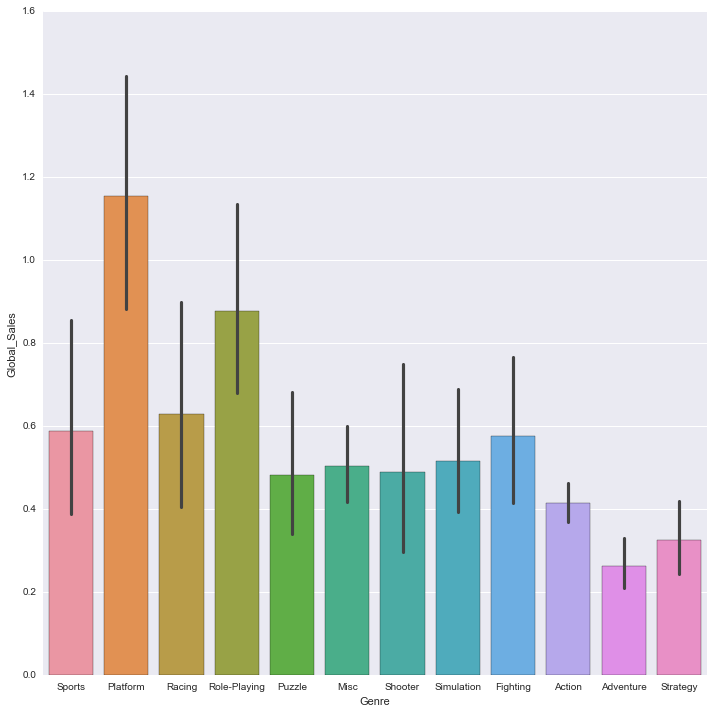

In [168]:
sb.factorplot(x='Genre', 
              y='Global_Sales',
              kind='bar', 
              data = nintendo,
             size=10)

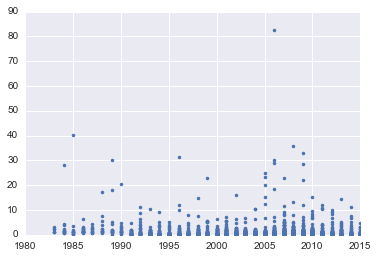

In [169]:
# Create scatterplot

# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(nintendo.Year, nintendo.Global_Sales, '.')
# show the plot
plt.show()

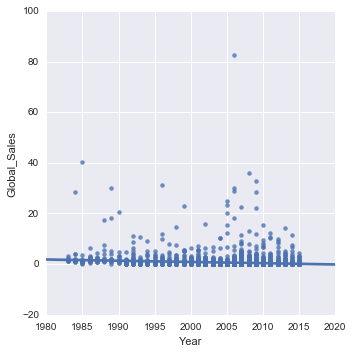

In [170]:
# Linear Regression

sb.lmplot('Year', 'Global_Sales', nintendo)

In [171]:
# How well does this fit
# Low R-Square, but low p-value

lm = smf.ols(formula='Global_Sales ~ Year', data=nintendo).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     95.94
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           1.73e-22
Time:                        20:51:46   Log-Likelihood:                -13204.
No. Observations:                6123   AIC:                         2.641e+04
Df Residuals:                    6121   BIC:                         2.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     98.6817     10.017      9.851      0.000        79.045   118.319
Year          -0.0489      0.005     -9.795      0.000        -0.059    -0.039
==============================================================================
Omnibus:                    12660.651   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59966906.434
Skew:                          17.306   Prob(JB):                         0.00
Kurtosis:                     486.582   Cond. No.                     7.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While there's a low p-value, the R-squared value is also low. Year is not a good predictor of how well a game will sell. 

In [175]:
# The different game genres for Nintendo, the console

nintendo.Genre.value_counts()

Action          1116
Misc             920
Sports           780
Role-Playing     504
Platform         502
Simulation       444
Adventure        426
Puzzle           419
Racing           367
Shooter          248
Fighting         217
Strategy         180
Name: Genre, dtype: int64

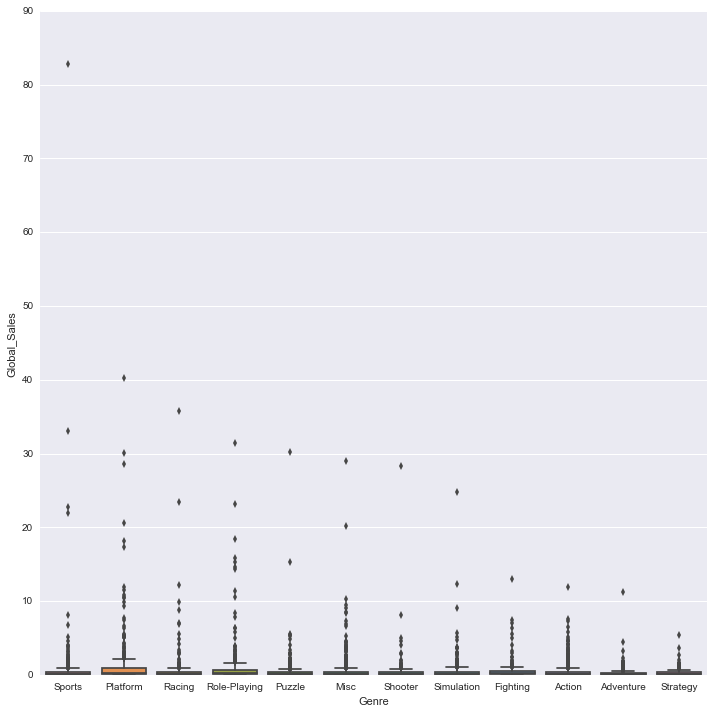

In [176]:
# How well each game genre sells for Nintendo

sb.factorplot(
    x='Genre',
    y='Global_Sales',
    data=nintendo, 
    kind='box',
    size=10
)

In [177]:
# Top 10 Most Popular Publishers for Nintendo Games

from collections import Counter
publisher = Counter(nintendo['Publisher'].tolist()).most_common(10)
print publisher

[('Nintendo', 686), ('Ubisoft', 434), ('Activision', 371), ('Namco Bandai Games', 369), ('THQ', 368), ('Electronic Arts', 331), ('Konami Digital Entertainment', 323), ('Sega', 163), ('Disney Interactive Studios', 129), ('Capcom', 125)]


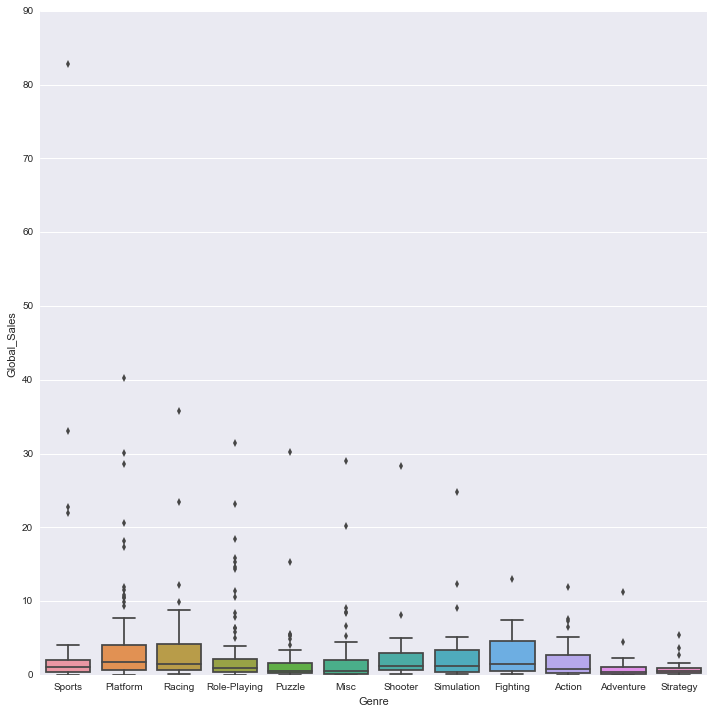

In [178]:
# How well each game genre sells for the publisher Nintendo on Nintendo consoles

pub1_data = nintendo[nintendo.Publisher == 'Nintendo']

sb.factorplot(
    x='Genre',
    y='Global_Sales',
    data=pub1_data, 
    kind='box',
    size=10
)

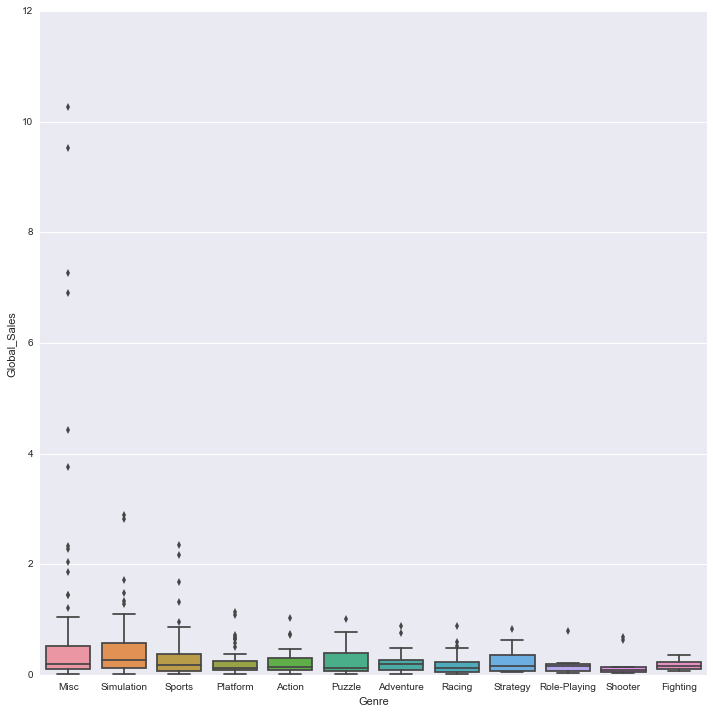

In [179]:
# How well each game genre sells for the publisher Ubisoft on Nintendo consoles

pub2_data = nintendo[nintendo.Publisher == 'Ubisoft']

sb.factorplot(
    x='Genre',
    y='Global_Sales',
    data=pub2_data, 
    kind='box',
    size=10
)

In [180]:
pub1_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


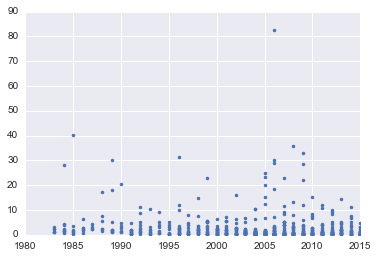

In [181]:
# Create scatterplot

# create a matplotlib figure
plt.figure()
# generate a scatterplot inside the figure
plt.plot(pub1_data.Year, pub1_data.Global_Sales, '.')
# show the plot
plt.show()

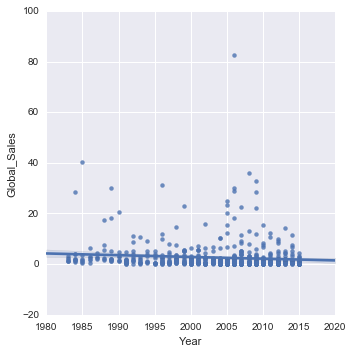

In [182]:
# Linear Regression

sb.lmplot('Year', 'Global_Sales', pub1_data)

In [183]:
lm = smf.ols(formula='Global_Sales ~ Year', data=pub1_data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.914
Date:                Mon, 05 Dec 2016   Prob (F-statistic):             0.0153
Time:                        20:55:51   Log-Likelihood:                -2165.3
No. Observations:                 686   AIC:                             4335.
Df Residuals:                     684   BIC:                             4344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    140.3514     56.647      2.478      0.013        29.129   251.574
Year          -0.0688      0.028     -2.432      0.015        -0.124    -0.013
==============================================================================
Omnibus:                      889.003   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           133099.706
Skew:                           6.599   Prob(JB):                         0.00
Kurtosis:                      69.950   Cond. No.                     5.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Top 5 Genre of Games per Console

Nintendo: platform, role-playing, racing, **sports**, fighting  
Playstation: shooter, platform, racing, action, **sports**  
Xbox: shooter, role-playing, action, misc, **sports**  

In [191]:
pub1_data[(pub1_data['Genre'] == 'Sports')].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
298,299,Golf,NES,1984.0,Sports,Nintendo,1.22,0.28,2.46,0.04,4.01


In [192]:
pub1_data[(pub1_data['Genre'] == 'Sports')].tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8494,8496,True Swing Golf,DS,2005.0,Sports,Nintendo,0.11,0.00,0.04,0.01,0.16
10035,10037,Pocket Soccer League: Calciobit,3DS,2012.0,Sports,Nintendo,0.00,0.00,0.11,0.00,0.11
11923,11925,Itoi Shigesato no Bass Tsuri No. 1 Ketteihan!,N64,2000.0,Sports,Nintendo,0.00,0.00,0.07,0.00,0.07
12123,12125,Mario Tennis,Wii,2010.0,Sports,Nintendo,0.00,0.06,0.00,0.01,0.07
14626,14629,Calcio Bit,GBA,2006.0,Sports,Nintendo,0.00,0.00,0.03,0.00,0.03


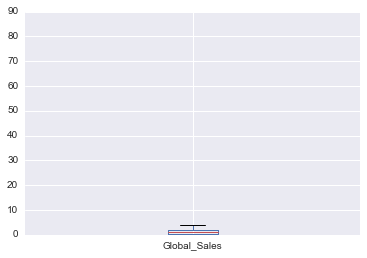

In [193]:
pub1_data[(pub1_data['Genre'] == 'Sports')].plot(kind='box', y='Global_Sales')

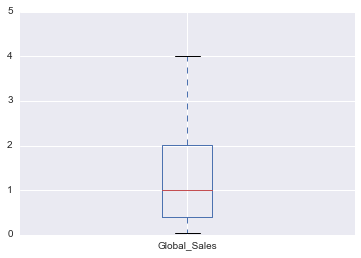

In [196]:
pub1_data[(pub1_data['Genre'] == 'Sports')].plot(kind='box', y='Global_Sales', ylim=(0,5))

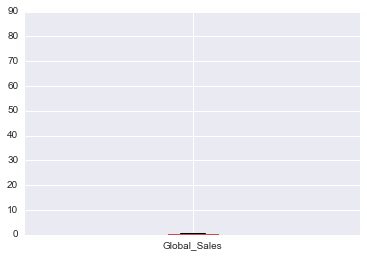

In [120]:
nintendo[(nintendo['Genre'] == 'Sports')].plot(kind='box', y='Global_Sales')

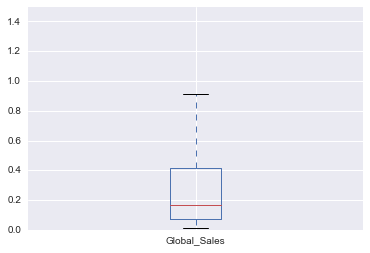

In [121]:
nintendo[(nintendo['Genre'] == 'Sports')].plot(kind='box', y='Global_Sales', ylim=(0,1.5))

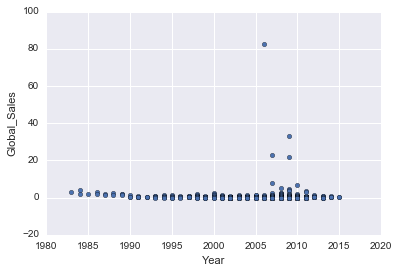

In [122]:
nintendo[(nintendo['Genre'] == 'Sports')].plot(kind='scatter', x='Year', y='Global_Sales')

In [123]:
nin_Sports = nintendo[(nintendo['Genre'] == 'Sports')]
nin_Sports.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
85,86,Mario & Sonic at the Olympic Games,Wii,2007.0,Sports,Sega,2.58,3.90,0.66,0.91,8.06


In [124]:
nin_gd = nintendo.join(pd.get_dummies(nintendo.Genre, prefix = 'genre'))
nin_gd.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,genre_Fighting,genre_Misc,genre_Platform,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [125]:
y = nin_gd['Global_Sales']
games = nin_gd[['genre_Action', 'genre_Misc', 'genre_Sports', 'genre_Role-Playing', 'genre_Platform', 'genre_Simulation', 'genre_Adventure', 'genre_Puzzle', 'genre_Racing', 'genre_Shooter', 'genre_Fighting']]

lm_stats = smf.ols(formula='y ~ games', data=nin_gd).fit()
lm_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.384
Date:                Mon, 05 Dec 2016   Prob (F-statistic):           1.29e-10
Time:                        20:39:01   Log-Likelihood:                -13216.
No. Observations:                6123   AIC:                         2.646e+04
Df Residuals:                    6111   BIC:                         2.654e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3244      0.156      2.076      0.038         0.018     0.631
games[0]       0.0899      0.168      0.534      0.594        -0.240     0.420
games[1]       0.1789      0.171      1.047      0.295        -0.156     0.514
games[2]       0.2633      0.173      1.518      0.129        -0.077     0.603
games[3]       0.5513      0.182      3.028      0.002         0.194     0.908
games[4]       0.8299      0.182      4.555      0.000         0.473     1.187
games[5]       0.1901      0.185      1.026      0.305        -0.173     0.553
games[6]      -0.0623      0.186     -0.334      0.738        -0.428     0.303
games[7]       0.1560      0.187      0.835      0.404        -0.210     0.522
games[8]       0.3036      0.191      1.591      0.112        -0.070     0.678
games[9]       0.1633      0.205      0.795      0.426        -0.239     0.566
games[10]      0.2521      0.211      1.192      0.233        -0.162     0.667
==============================================================================
Omnibus:                    12639.218   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         59219240.475
Skew:                          17.240   Prob(JB):                         0.00
Kurtosis:                     483.551   Cond. No.                         21.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
from sklearn import feature_selection, linear_model

def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo


P Values: [  6.84536962e-03   3.08546363e-01   7.85441872e-01   6.29999230e-04
   7.42159203e-11   5.74780082e-01   1.85643333e-03   3.75478039e-01
   5.76787640e-01   5.37828665e-01   9.54581945e-01]
Coefficients: [ 0.08987455  0.17888164  0.26328632  0.55134921  0.82993803  0.19006006
 -0.06230829  0.15603288  0.30362095  0.16333781  0.25209933]
y-intercept: 0.324444444444
R-Squared: 0.0113606271427


/Users/suelee/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/suelee/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

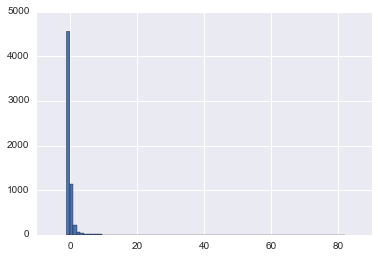

In [127]:
y = nin_gd['Global_Sales']
lm = linear_model.LinearRegression()

print
# drop the least significant genre = Strategy
get_linear_model_metrics(nin_gd[['genre_Action', 'genre_Misc', 'genre_Sports', 'genre_Role-Playing', 'genre_Platform', 'genre_Simulation', 'genre_Adventure', 'genre_Puzzle', 'genre_Racing', 'genre_Shooter', 'genre_Fighting']], y, lm)

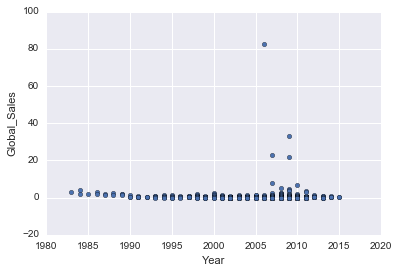

In [128]:
nin_gd[(nin_gd['genre_Sports'] == 1)].plot(kind='scatter', x='Year', y='Global_Sales')

# Playstation

In [129]:
playstation = data[(data['Platform'] == 'PS') | (data['Platform'] == 'PS2') | (data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'PSP') | (data['Platform'] == 'PSV')]
print playstation.describe()

               Rank         Year     NA_Sales     EU_Sales     JP_Sales  \
count   6363.000000  6363.000000  6363.000000  6363.000000  6363.000000   
mean    7926.242810  2006.210121     0.236373     0.168793     0.072207   
std     4838.070919     5.417816     0.517275     0.433980     0.214623   
min       17.000000  1994.000000     0.000000     0.000000     0.000000   
25%     3667.500000  2002.000000     0.000000     0.000000     0.000000   
50%     7655.000000  2007.000000     0.070000     0.040000     0.000000   
75%    12115.500000  2010.000000     0.225000     0.150000     0.060000   
max    16598.000000  2015.000000     9.430000     9.270000     4.870000   

       Other_Sales  Global_Sales  
count  6363.000000   6363.000000  
mean      0.072163      0.549481  
std       0.242273      1.129833  
min       0.000000      0.010000  
25%       0.000000      0.070000  
50%       0.020000      0.200000  
75%       0.060000      0.550000  
max      10.570000     21.400000  


In [130]:
playstation.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24


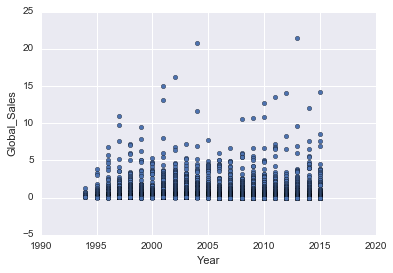

In [131]:
playstation.plot(kind='scatter', x='Year', y='Global_Sales')

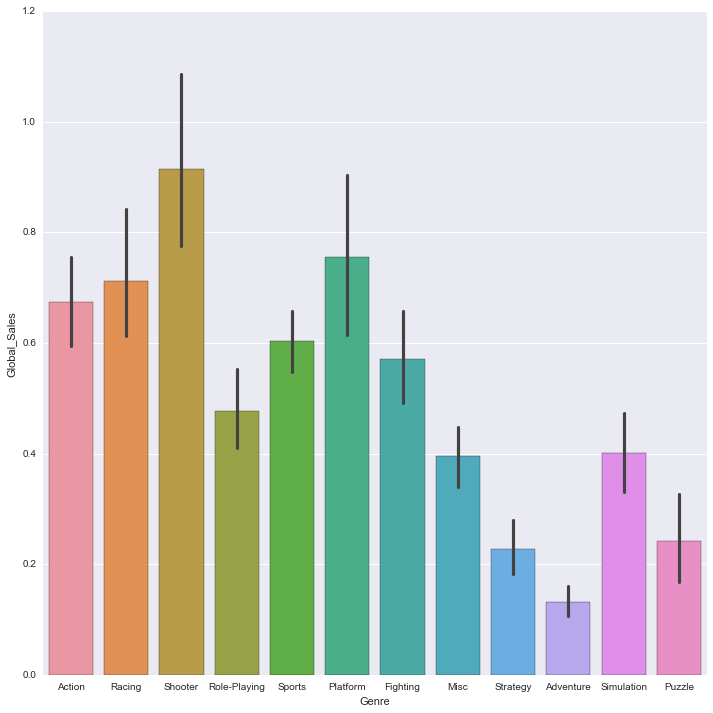

In [132]:
sb.factorplot(x='Genre', 
              y='Global_Sales',
              kind='bar', 
              data = playstation,
             size=10)

# Xbox

In [133]:
xbox = data[(data['Platform'] == 'X360') | (data['Platform'] == 'XB') | (data['Platform'] == 'XOne')]
print xbox.describe()

               Rank         Year     NA_Sales    EU_Sales     JP_Sales  \
count   2189.000000  2189.000000  2189.000000  2189.00000  2189.000000   
mean    7374.135222  2007.895386     0.389461     0.17281     0.006400   
std     4564.904971     3.975993     0.850373     0.39716     0.020526   
min       16.000000  2000.000000     0.000000     0.00000     0.000000   
25%     3371.000000  2004.000000     0.070000     0.01000     0.000000   
50%     7224.000000  2008.000000     0.150000     0.04000     0.000000   
75%    10849.000000  2011.000000     0.370000     0.16000     0.000000   
max    16556.000000  2015.000000    14.970000     5.31000     0.240000   

       Other_Sales  Global_Sales  
count  2189.000000   2189.000000  
mean      0.047487      0.616519  
std       0.114567      1.327004  
min       0.000000      0.010000  
25%       0.000000      0.090000  
50%       0.010000      0.220000  
75%       0.040000      0.600000  
max       1.670000     21.820000  


In [134]:
xbox.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


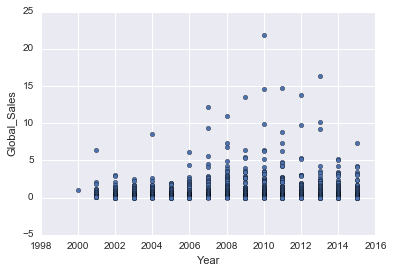

In [135]:
xbox.plot(kind='scatter', x='Year', y='Global_Sales')

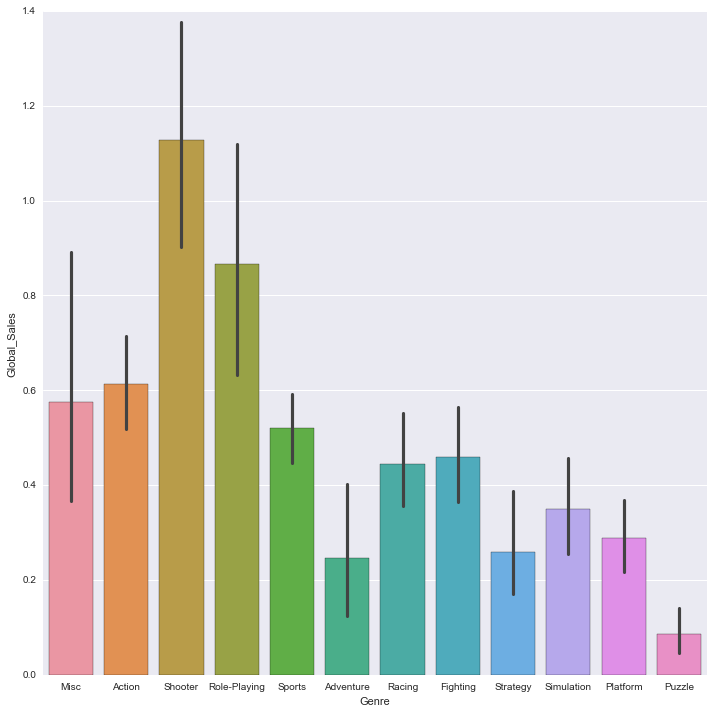

In [136]:
sb.factorplot(x='Genre', 
              y='Global_Sales',
              kind='bar', 
              data = xbox,
             size=10)

In [137]:
xbox[xbox.Genre == 'Action'].mean()

Rank            6994.274131
Year            2008.731660
NA_Sales           0.368224
EU_Sales           0.189981
JP_Sales           0.006062
Other_Sales        0.049537
Global_Sales       0.613977
dtype: float64

# Misc

In [138]:
# Check to see if there are any games that span across multiple platforms, like GTA.
gta = data[data['Name'].str.contains("Grand Theft Auto")]
gta.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10


In [139]:
# See if there are any correlations.
# Looks like there are correlations in sales data-- not surprising
# Interesting which area's sales have correlation - like European Sales don't have such a strong correlation with Japan Sales

data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.162287,-0.400187,-0.378374,-0.269076,-0.331476,-0.426326
Year,0.162287,1.000000,-0.085347,0.011394,-0.170121,0.047488,-0.069223
NA_Sales,-0.400187,-0.085347,1.000000,0.770262,0.451618,0.634225,0.941499
EU_Sales,-0.378374,0.011394,0.770262,1.000000,0.437859,0.725572,0.903753
JP_Sales,-0.269076,-0.170121,0.451618,0.437859,1.000000,0.290955,0.613358
Other_Sales,-0.331476,0.047488,0.634225,0.725572,0.290955,1.000000,0.747362
Global_Sales,-0.426326,-0.069223,0.941499,0.903753,0.613358,0.747362,1.000000


# Decision Tree

In [140]:
nin_gd['Global_Sales'] = nin_gd['Global_Sales'].astype(np.int64)

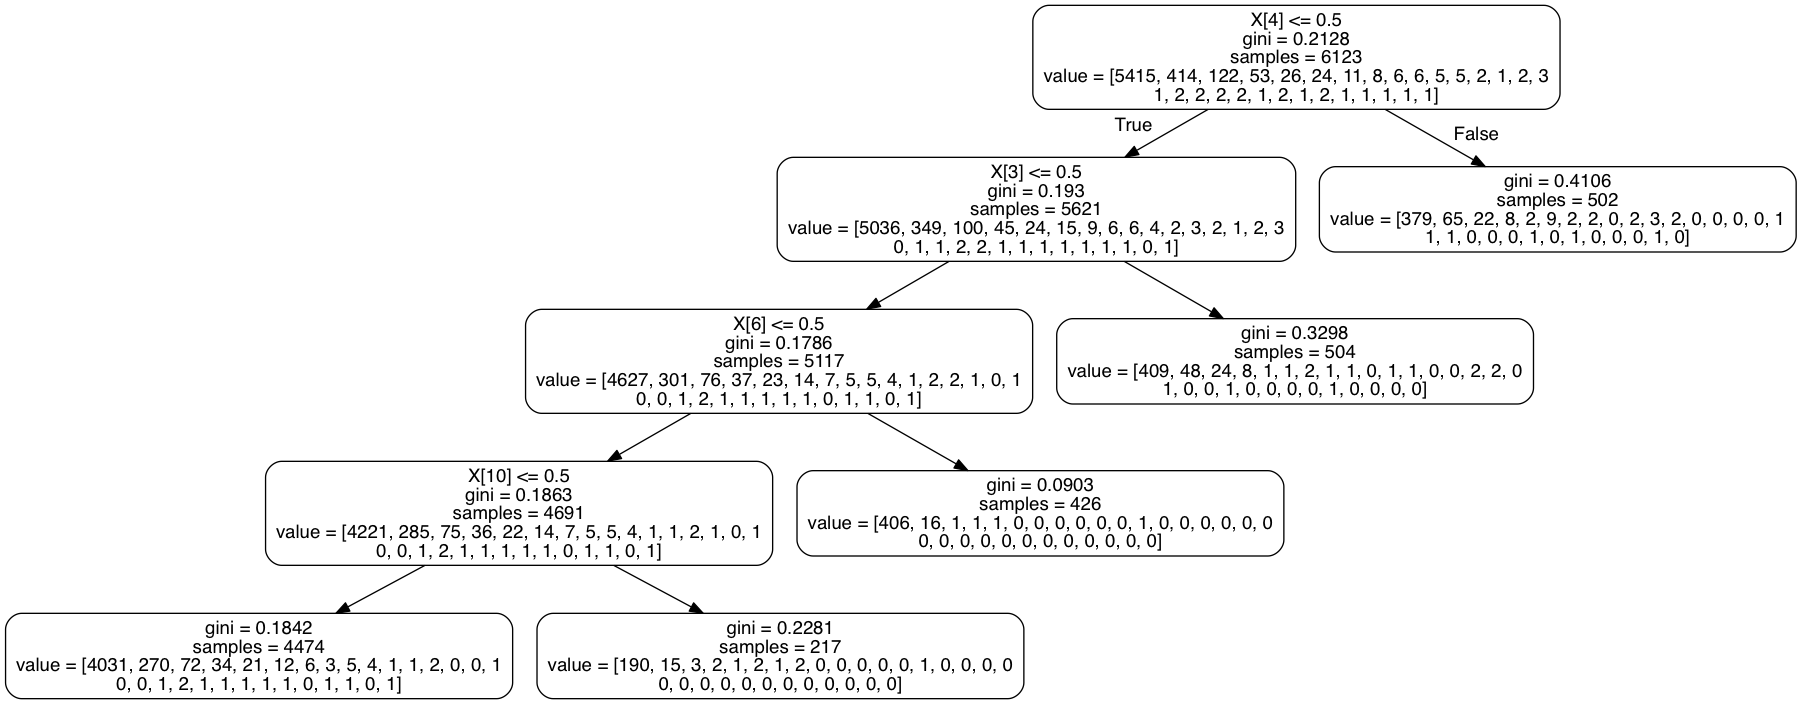

In [141]:
from sklearn import tree
from IPython.display import Image  
import pydotplus 

clf = tree.DecisionTreeClassifier(max_depth=4)
X = nin_gd[['genre_Action', 'genre_Misc', 'genre_Sports', 'genre_Role-Playing', 'genre_Platform', 'genre_Simulation', 'genre_Adventure', 'genre_Puzzle', 'genre_Racing', 'genre_Shooter', 'genre_Fighting', 'Global_Sales']].dropna()
Y = X['Global_Sales']
X.drop('Global_Sales', axis=1, inplace=True)
clf = clf.fit(X, Y)

dot_data = tree.export_graphviz(clf,
                                rounded=True)
graph = pydotplus.graphviz.graph_from_dot_file("tree.dot")
Image(graph.create_png())